In [25]:
import numpy as np
import random
import matplotlib.pyplot as plt

dim = 30
N = 500
M = 5
timestep = 2000
beta = 50
lambda_ = 0.1
sigma_ = 1
h = 0.01

current = np.random.rand(N, dim)*2+1

In [26]:
def L(x):

    ## Rastragin Function

    #if x[0] > -1 and x[0] < -0.9 and x[1] > -1 and x[1] < -0.9:
    #    return 0
    #return 1
    return np.sum(x**2)/dim-10*np.sum(np.cos(2*3.141592653*x))/dim+10

def gradL(x):

    return 2*x+10*np.sin(x)

print(current[0])
print(L(current[0]))
print(gradL(current[0]))


[1.15246885 1.77508142 1.39944325 2.97687327 2.0425774  2.47410463
 1.47464428 2.67101031 2.54957174 2.66012943 1.35794462 1.61929882
 1.44305557 1.022773   1.52341844 2.34686465 1.64034658 2.20210032
 2.92162863 1.69334726 1.51375143 2.49836151 2.28492859 1.57478886
 2.55607097 2.66395971 2.64200402 2.56217074 1.38118062 1.71010245]
18.311303847124663
[11.4426342  13.3422255  12.65243599  7.59350172 12.9927573  11.13836013
 12.90309808  9.8760747  10.67953493  9.95102441 12.49021396 13.22683748
 12.80463353 10.58110639 13.03561566 11.83046032 13.25651672 12.47678647
  8.02520242 13.3116948  13.01123668 10.99456309 12.12647579 13.14949802
 10.63848437  9.92470258 10.07465294 10.59974448 12.58312862 13.32333074]


0
5.185821074880648
1000
0.23209456883802582
2000
0.17833396283245145
3000
0.1811023915521352
4000
0.1768254636494106
5000
0.1767978506153062
6000
0.17689634633669454
7000
0.1768553795558656
8000
0.1768547579043346
9000
0.17685499049122136
[0.2917877  0.24772245 0.1094991  0.13549347]
SUCCESS COUNT:
0


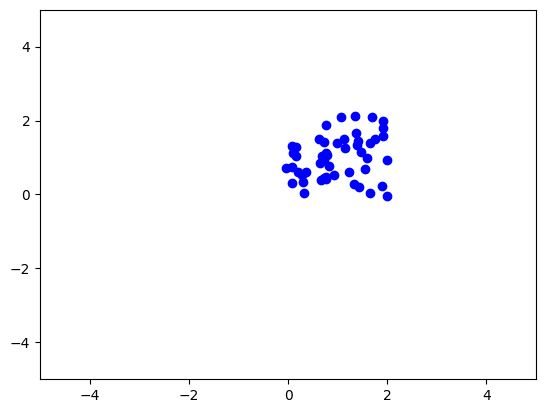

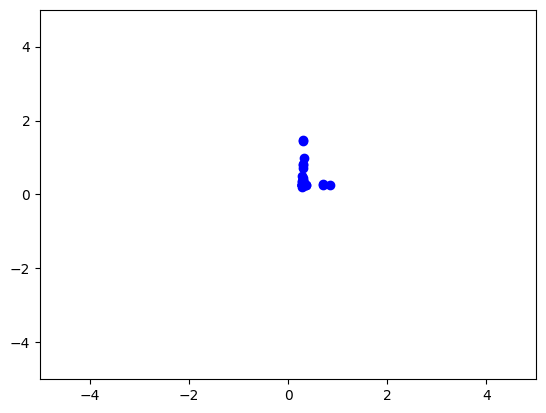

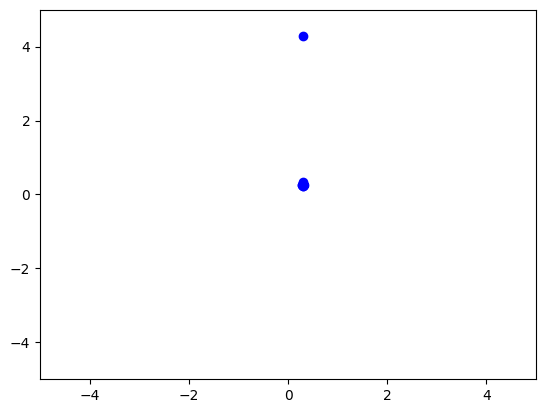

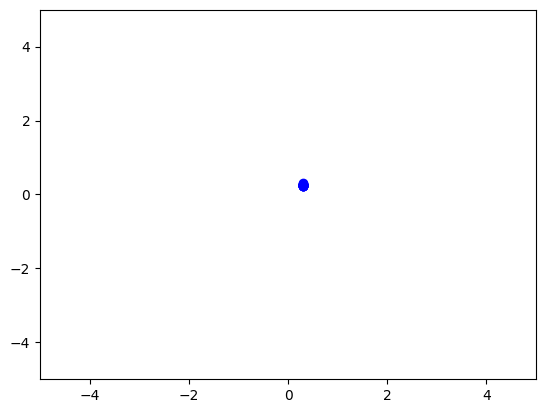

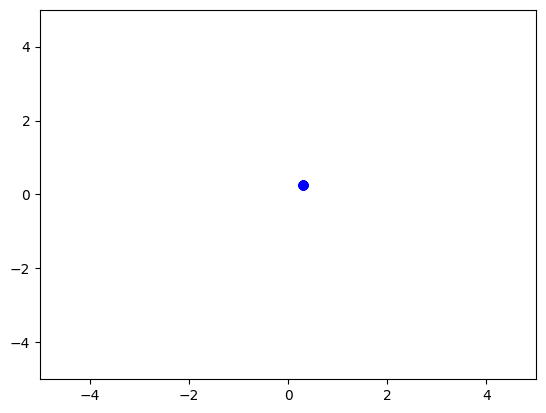

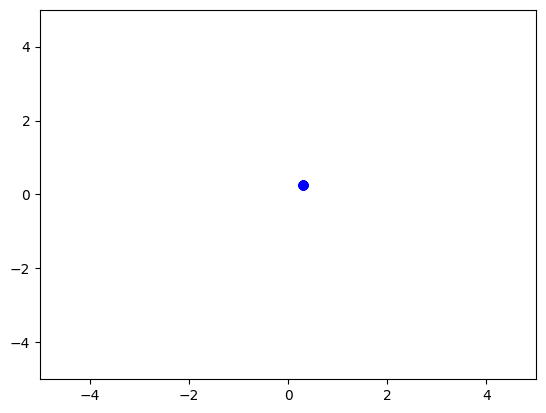

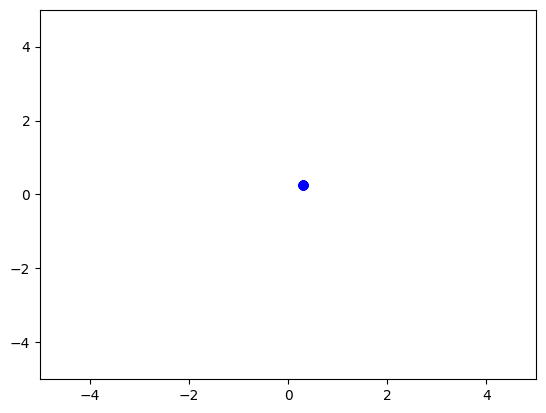

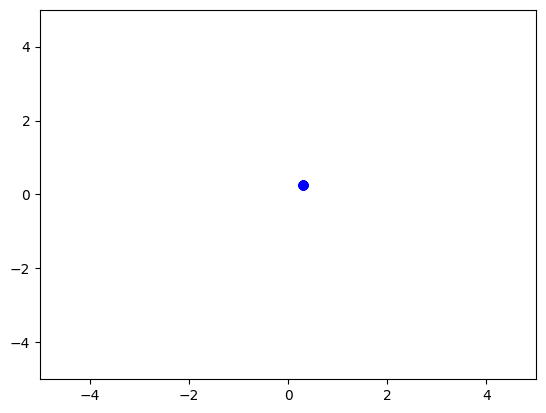

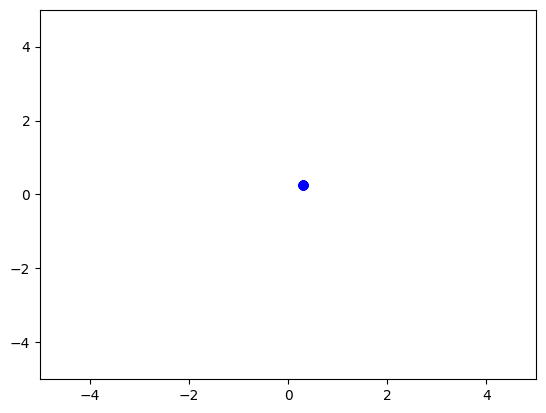

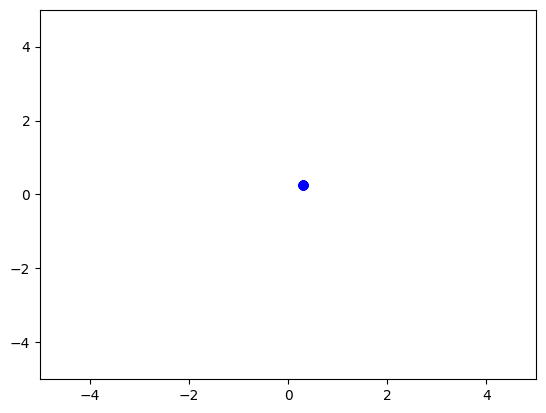

: 

In [4]:
import math
from scipy.spatial import ConvexHull

momentum = np.zeros((N, dim))
beta_1 = 0.99
EXPNUM = 1
Loss_change = []
Final_result = []
Trajectory = []
Success_count = 0

for t in range(EXPNUM):

    momentum = np.zeros((N, dim))
    current = np.random.rand(N, dim)*2

    for i in range(timestep):

        if t==0:
            Loss_change.append(L(current[0]))
            Trajectory.append(np.array([current[0][0],current[0][1]]))

        alpha = np.zeros(N)
        Lval = np.zeros(N)
        sn = np.zeros(dim)

        for j in range(N):
            Lval[j] = L(current[j])
        
        Lmin = np.min(Lval)

        for j in range(N):
            Lval[j] = np.exp(-beta*(Lval[j]-Lmin))

        alpha = Lval/np.sum(Lval)
        for j in range(N):
            sn = sn + alpha[j]*current[j]

        for j in range(N):

            Zrand = np.random.randn(dim)
            #current[j] = (1-lambda_*h)*current[j]+lambda_*h*sn + math.pow(0.99, i/10)*Zrand
            current[j] = (1-lambda_*h)*current[j]+lambda_*h*sn+sigma_*np.sqrt(h)*(sn-current[j])*Zrand

        #ConvexHullList.append(ConvexHull(current).volume)

        if i%1000 == 0:

            print(i)
            print(L(current[0]))
            plt.figure(i//1000)
            plt.xlim([-5,5])
            plt.ylim([-5,5])

            for j in range(N):

                if L(current[j])==1000000:
                    plt.scatter(current[j,0],current[j,1], color = 'g')
                    #plt.quiver(current[j,0],current[j,1],sn[0]-current[j,0],sn[1]-current[j,1], color = 'b')
                else:
                    plt.scatter(current[j,0],current[j,1], color = 'b')
                    #plt.quiver(current[j,0],current[j,1],sn[0]-current[j,0],sn[1]-current[j,1], color = 'g')

            #plt.scatter(sn[0],sn[1], color = 'r')

        '''
        if np.sum(np.abs(current[0]-current[1])+np.abs(current[0]-current[2])+np.abs(current[0]-current[3])<0.0001):

            print(L(current[0]))
            plt.figure(t)
            for j in range(N):
                plt.scatter(current[j,0],current[j,1], color = 'm')
            break
        '''
    Final_result.append(L(current[0]))
    if(np.max(current[0])<0.25):
        Success_count = Success_count+1
    #plt.plot(ConvexHullList)
    #print(Trajectory)
    print(current[0])

print("SUCCESS COUNT:")
print(Success_count)

0
12.947416521059944
[ 0.64902867  0.54095457  0.17452348  1.27190453  0.40859086 -1.57455766
 -0.55084227 -0.41428497  0.31849759  0.81679699 -1.12159726 -0.80937087
 -1.71655732 -2.0203282  -1.05968599  3.09295579 -0.62560699  0.23195072
  0.06803266 -2.41250499 -1.60640642 -1.45754571 -1.52330074 -1.63268613
 -1.81006213 -0.32904022 -1.06840172  0.90853953  1.32169169  0.25742249]
100
15.69618636667671
[-1.11039098  1.9435845  -0.75150241  4.75184665 -1.55296339  1.28682722
  1.55150211 -0.45469151 -2.71538411  0.59485974 -2.13619341  1.20779484
  1.43606433  0.83473312 -0.13551418 -3.15050358  3.36643857 -2.1061389
  0.7264644   2.172941    0.99025614  2.73039127 -2.47772444  3.71853565
 -5.19635127  0.50662488  2.70820515 -0.57489512 -0.13409771  1.65307252]
200
10.18210079566102
[-0.88656916 -0.14304712  0.43482031  1.30208856 -0.75331446  0.6675293
  2.54540808  1.49362184 -0.48563112  0.92372597 -0.6400883   0.86807205
 -1.68107119 -0.83683866 -0.10680301  1.15242526  0.8261395

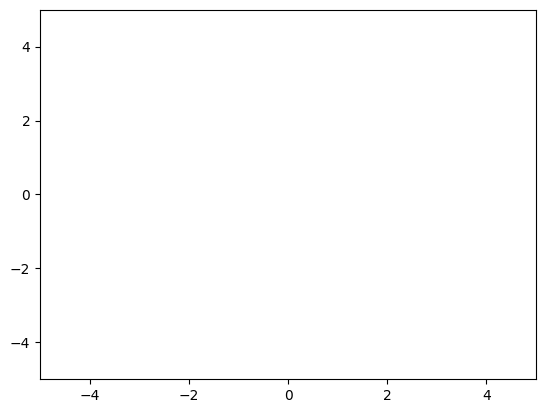

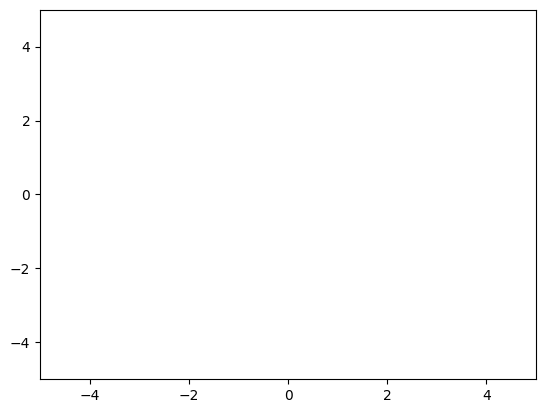

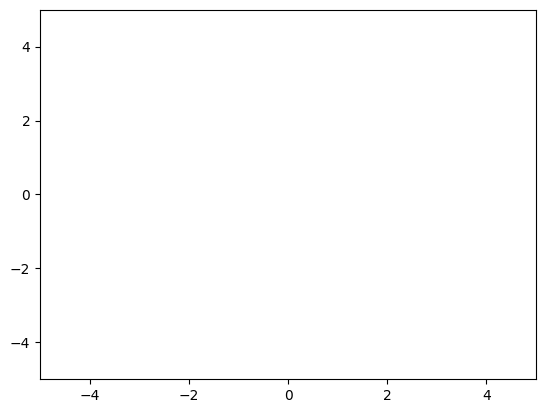

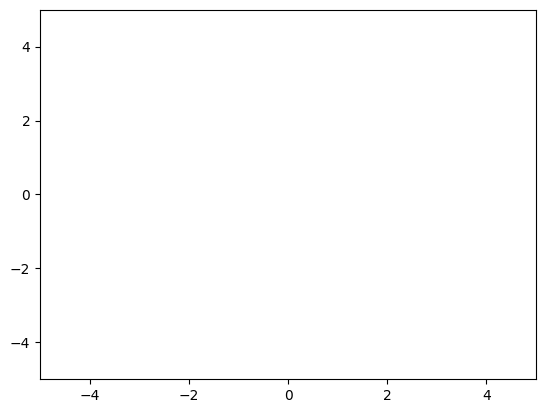

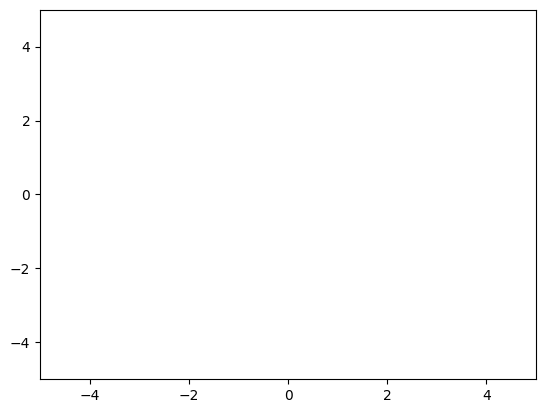

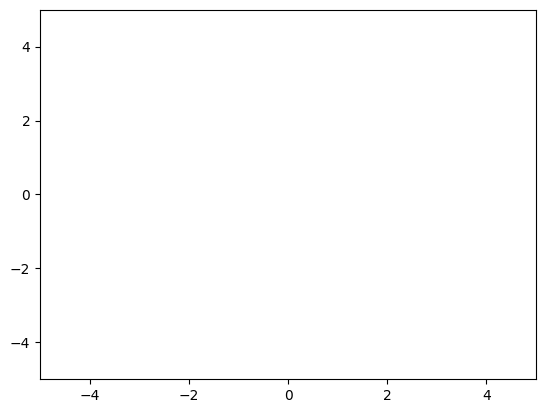

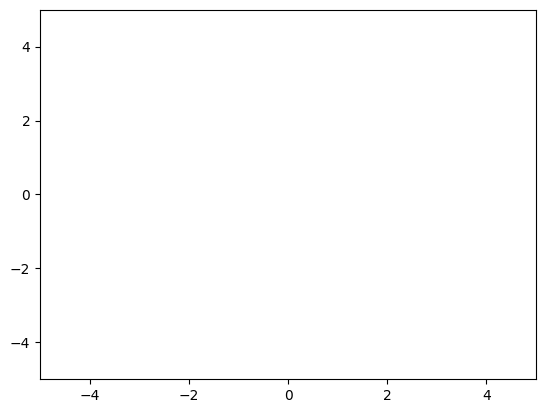

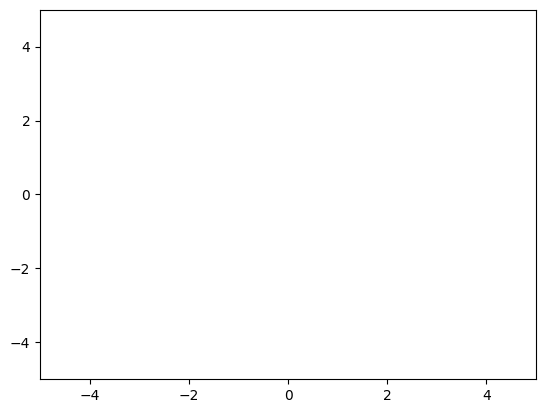

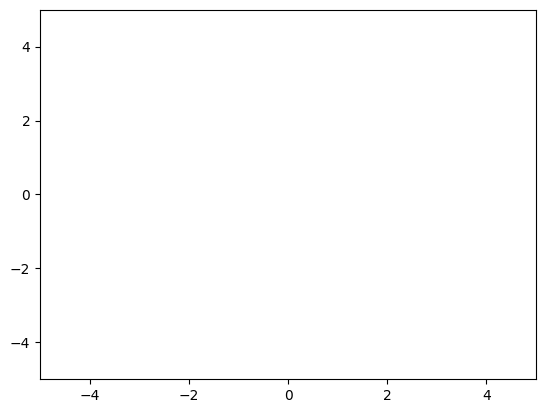

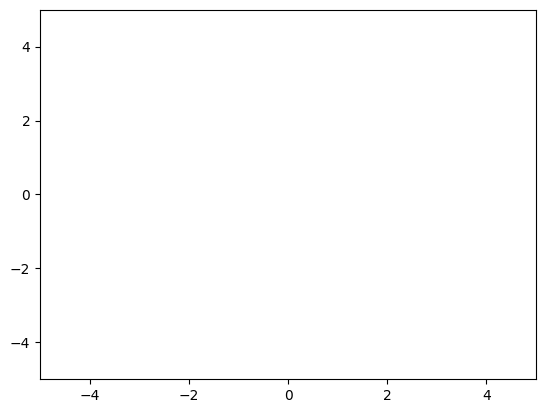

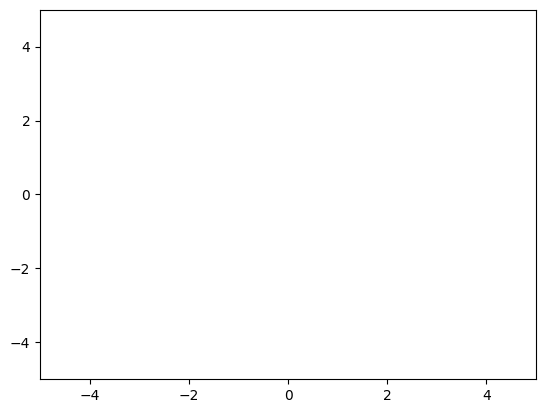

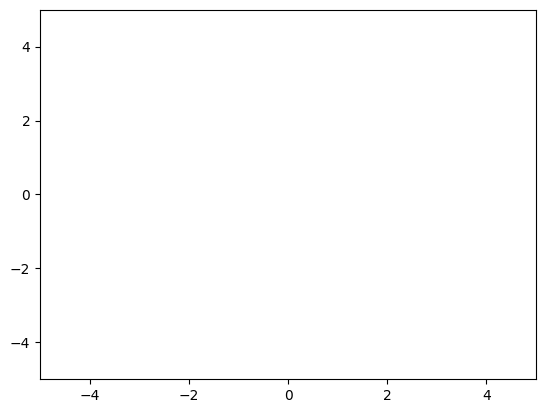

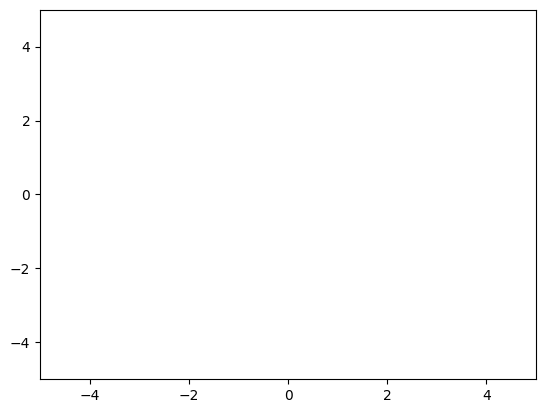

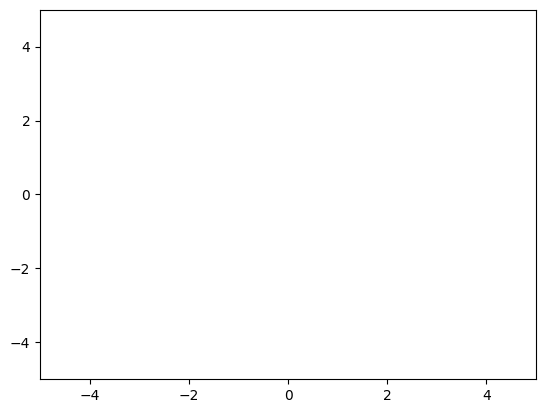

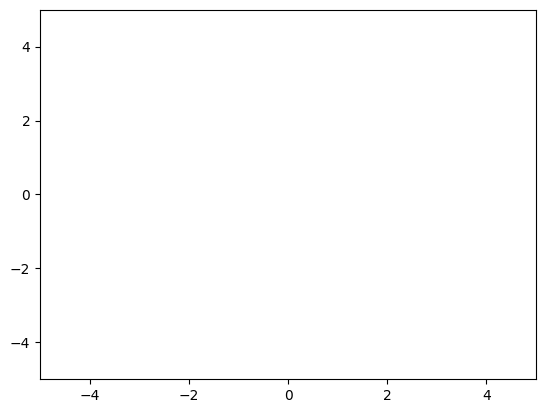

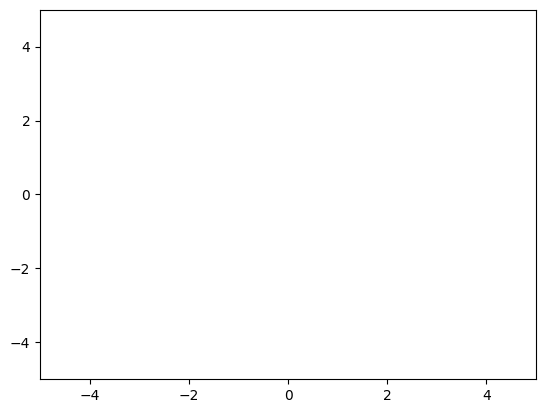

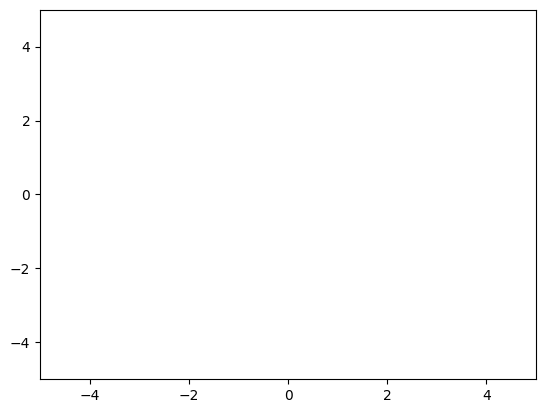

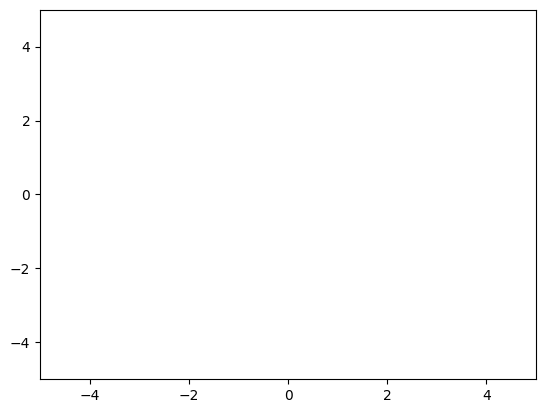

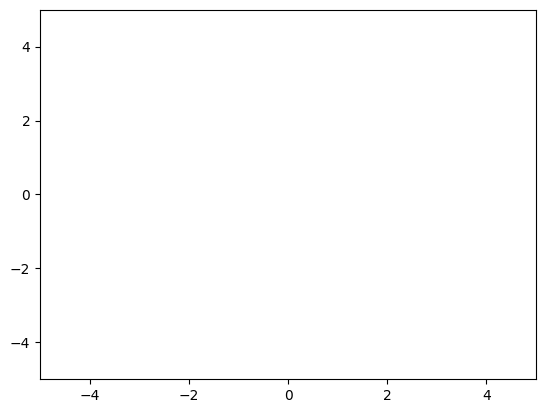

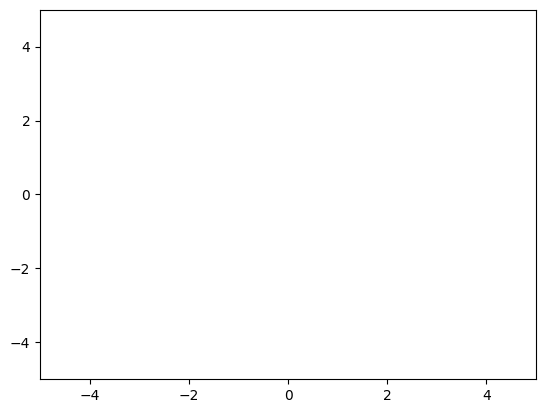

: 

In [28]:
import math
from scipy.spatial import ConvexHull

momentum = np.zeros((N, dim))
beta_1 = 0.9
beta_2 = 0.99
EXPNUM = 10
Loss_change = []
Final_result = []
Trajectory = []
Success_count = 0

for t in range(EXPNUM):

    momentum = np.zeros((N, dim))
    var = np.zeros((N, dim))
    current = np.random.rand(N, dim)*2-1
    ConvexHullList2 = []
    Trajectory2 = []

    for i in range(timestep):

        if t==0:
            Loss_change.append(L(current[0]))
            Trajectory.append(np.array([current[0][0],current[0][1]]))

        alpha = np.zeros((1,N))
        Lval = np.zeros(N)

        batch = np.random.permutation(N)
        
        for j in range(N):
            Lval[j] = L(current[j])

        for j in range(N//M):
            sampled_batch = batch[M*j:M*(j+1)]
            Lval[sampled_batch] = np.exp(-beta*(Lval[sampled_batch] - min(Lval[sampled_batch])))
            alpha = Lval[sampled_batch]/np.sum(Lval[sampled_batch])
            sn = np.matmul(alpha,current[sampled_batch])
            Zrand = np.random.randn(M,dim)
            momentum[sampled_batch] = momentum[sampled_batch]*(beta_1)+(current[sampled_batch]-sn)*(1-beta_1)
            #var[j] = var[j]*beta_2 + (current[j]-sn)*(current[j]-sn)*(1-beta_2)
            #current[j] = current[j] - lambda_*momentum[j]/(np.sqrt(var[j]/(1-math.pow(beta_2, i+1)))+1e-12)/(1-math.pow(beta_1, i+1)) + math.pow(0.99, i/20)*Zrand
            current[sampled_batch] = current[sampled_batch] - lambda_*momentum[sampled_batch] + math.pow(0.99, i/2)*Zrand
                    
        #ConvexHullList2.append(ConvexHull(current).volume)
        Trajectory2.append(np.array([current[0][0],current[0][1]]))

        if i%100 == 0:

            print(i)
            print(L(current[0]))
            print(current[0])
            plt.figure(i//100)
            plt.xlim([-5,5])
            plt.ylim([-5,5])

            #for j in range(N):

                #if L(current[j])==10000000:
                    #plt.scatter(current[j,0],current[j,1], color = 'b')
                    #plt.quiver(current[j,0],current[j,1],-momentum[j,0],-momentum[j,1], color = 'b')

                #else:
                    #plt.scatter(current[j,0],current[j,1], color = 'm')
                    #plt.quiver(current[j,0],current[j,1],-momentum[j,0],-momentum[j,1], color = 'm')

            #plt.scatter(sn[0],sn[1], color = 'r')

        '''
        if np.sum(np.abs(current[0]-current[1])+np.abs(current[0]-current[2])+np.abs(current[0]-current[3])<0.0001):
            print(L(current[0]))
            plt.figure(t)
            for j in range(N):
                plt.scatter(current[j,0],current[j,1], color = 'm')
            break
        '''

    Final_result.append(L(current[0]))
    print(current[0])
    #plt.plot(ConvexHullList2)
    #print(Trajectory2)
    if(np.max(current[0])<0.25):
        Success_count = Success_count+1

print("SUCCESS COUNT:")
print(Success_count)

In [1]:
print(current[0])

NameError: name 'current' is not defined

In [ ]:
print(Trajectory)

[array([1.67709666, 1.07094694]), array([1.70514278, 1.21099213]), array([1.68283597, 1.24833025]), array([1.68419623, 1.1183954 ]), array([1.72975556, 1.03952518]), array([1.7887699 , 0.96328299]), array([1.79178374, 1.05568422]), array([1.75233334, 1.3508375 ]), array([1.72057587, 1.33494957]), array([1.77616375, 1.37141894]), array([1.814801  , 1.53194489]), array([1.81834764, 1.62251397]), array([1.85249171, 1.55384064]), array([1.87336695, 1.51526118]), array([1.87059017, 1.45110851]), array([1.83028221, 1.52630939]), array([1.86923647, 1.54406867]), array([1.87080069, 1.58768225]), array([1.79417324, 1.63585127]), array([1.81151349, 1.71692932]), array([1.79761998, 1.69517562]), array([1.78244232, 1.72647002]), array([1.76456562, 1.77193625]), array([1.75227041, 1.67300058]), array([1.73591722, 1.59650926]), array([1.6886774 , 1.53494992]), array([1.65736973, 1.46266927]), array([1.69676895, 1.59040962]), array([1.72662352, 1.56807177]), array([1.8501672 , 1.68118031]), array([1.

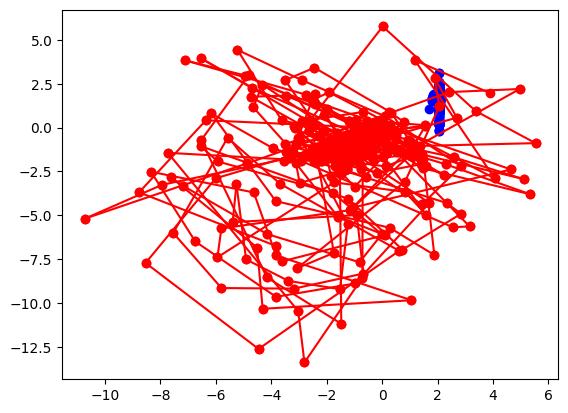

In [ ]:
for (i,pt) in enumerate(Trajectory):

    if i%10 == 0 and i+10 < len(Trajectory):
        plt.plot(np.array([Trajectory[i][0],Trajectory[i+10][0]]),np.array([Trajectory[i][1],Trajectory[i+10][1]]), 'bo-')

for (i,pt) in enumerate(Trajectory2):

    if i%10 == 0 and i+10 < len(Trajectory2):
        plt.plot(np.array([Trajectory2[i][0],Trajectory2[i+10][0]]),np.array([Trajectory2[i][1],Trajectory2[i+10][1]]), 'ro-')

plt.show()